In [20]:
%matplotlib inline

import keras
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

import os

In [21]:
model = keras.models.load_model('Models/test_model')

In [22]:
x_train = np.load('Models/x_train.npy')
x_val = np.load('Models/x_val.npy')
y_train = np.load('Models/y_train.npy')
y_val = np.load('Models/y_val.npy')

In [23]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [26]:
y_pred = model.predict_classes(x_val)

In [27]:
def visualize_images(data, labels, predict, start=0, cols=4, rows=4, size=10, fontsize=10):
    fig = plt.figure(figsize=(size, size))
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)
    
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[start - 1 + i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        
        pred = label_names[predict[start - 1+ i]]
        real = label_names[int(np.where(labels[start - 1 + i] == 1)[0])]
        plt.title('Predict: ' + pred + '\n Real Label: ' + real, fontsize=fontsize)
    plt.show()

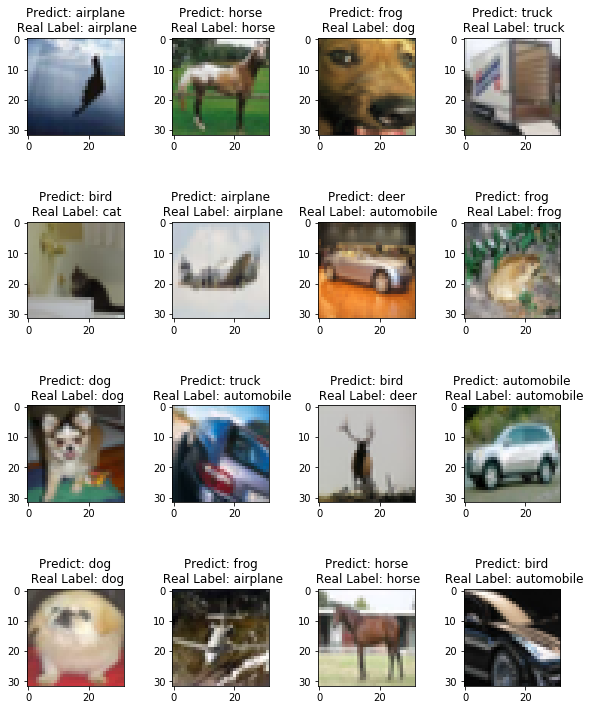

In [46]:
visualize_images(x_val, y_val, y_pred, start=0, fontsize=12)

In [29]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [30]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_val[1:2])

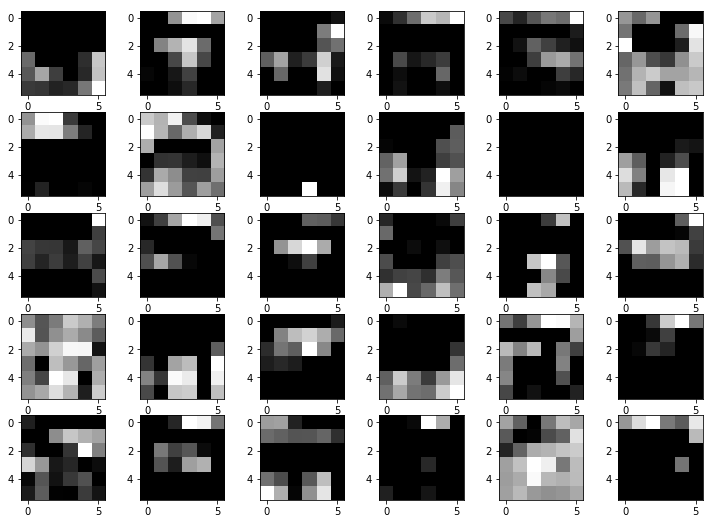

In [45]:
display_activation(activations, 6, 5,11)

In [32]:
model.layers[2].output[0, 1, :, :].shape[0:]

TensorShape([Dimension(30), Dimension(32)])

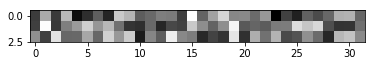

In [33]:
plt.imshow(model.layers[2].get_weights()[0][2, :, :, 0], cmap='gray')

In [34]:
def visualize_filters(filters, row, col, channel=0, figsize=(5,5)):
    fig, axes = plt.subplots(row, col, figsize=figsize)
    index = 0
    
    for i in range(row):
        for j in range(col):
            # filters[row, col, channel,filters index][rowm,col,filter index]
            axes[i, j].imshow(filters[:,:,channel,:][:,:,index], cmap='gray')
            index += 1
    
    plt.show()

In [35]:
filters = model.layers[8].get_weights()[0][:,:,:,:][:,:,:]

In [36]:
test_img = x_train[1][:,:,0]